# Importing essential libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,cross_val_score,KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,StackingRegressor,AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
import lightgbm as lgb
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
import warnings 
warnings.filterwarnings('ignore')

# Reading the data set 

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/PGP AUG-20/Capstone project/outliers.csv')
df.head()

,Unnamed: 0,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Type,Size,Weekly_Sales,markdown,Dep_type,Week
0,8,70.98,3.545,130.790968,5.936,0,2,93188,48071.57,1,5,33
1,41,65.21,2.645,126.279167,10.210,0,3,158114,67464.65,0,5,40
2,50,74.86,4.004,135.963935,7.806,0,3,203819,75406.78,0,5,30
3,54,26.39,3.240,137.054243,8.458,0,2,119557,60235.59,0,5,5
4,72,85.26,3.227,221.521506,6.565,0,2,140167,48490.86,1,5,27


In [ ]:
df = df.drop('Unnamed: 0',axis=1)

In [ ]:
print('Number of rows in the data set = {}\nNumber of columns in the data set = {}'.format(df.shape[0],df.shape[1]))

Number of rows in the data set = 35377
Number of columns in the data set = 11


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35377 entries, 0 to 35376
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Temperature   35377 non-null  float64
 1   Fuel_Price    35377 non-null  float64
 2   CPI           35377 non-null  float64
 3   Unemployment  35377 non-null  float64
 4   IsHoliday     35377 non-null  int64  
 5   Type          35377 non-null  int64  
 6   Size          35377 non-null  int64  
 7   Weekly_Sales  35377 non-null  float64
 8   markdown      35377 non-null  int64  
 9   Dep_type      35377 non-null  int64  
 10  Week          35377 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 3.0 MB


In [ ]:
df.describe()

,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Type,Size,Weekly_Sales,markdown,Dep_type,Week
count,35377.000000,35377.000000,35377.000000,35377.000000,35377.000000,35377.000000,35377.000000,35377.000000,35377.000000,35377.000000,35377.000000
mean,60.387519,3.359245,170.343319,7.742377,0.073551,2.668146,169150.041976,75182.490953,0.370665,4.534076,26.545326
std,17.937607,0.452869,39.024394,1.405006,0.261042,0.581498,50753.695205,30249.939099,0.482990,0.929156,14.471105
min,5.280000,2.472000,126.064000,4.377000,0.000000,1.000000,34875.000000,47498.190000,0.000000,1.000000,1.000000
25%,47.190000,2.938000,131.098323,6.989000,0.000000,2.000000,126512.000000,55200.590000,0.000000,5.000000,14.000000
50%,62.390000,3.433000,181.677256,7.856000,0.000000,3.000000,200898.000000,66002.630000,0.000000,5.000000,26.000000
75%,74.660000,3.730000,211.471329,8.476000,0.000000,3.000000,203819.000000,84124.350000,1.000000,5.000000,39.000000
max,99.220000,4.468000,227.232807,11.081000,1.000000,3.000000,219622.000000,693099.360000,1.000000,5.000000,52.000000


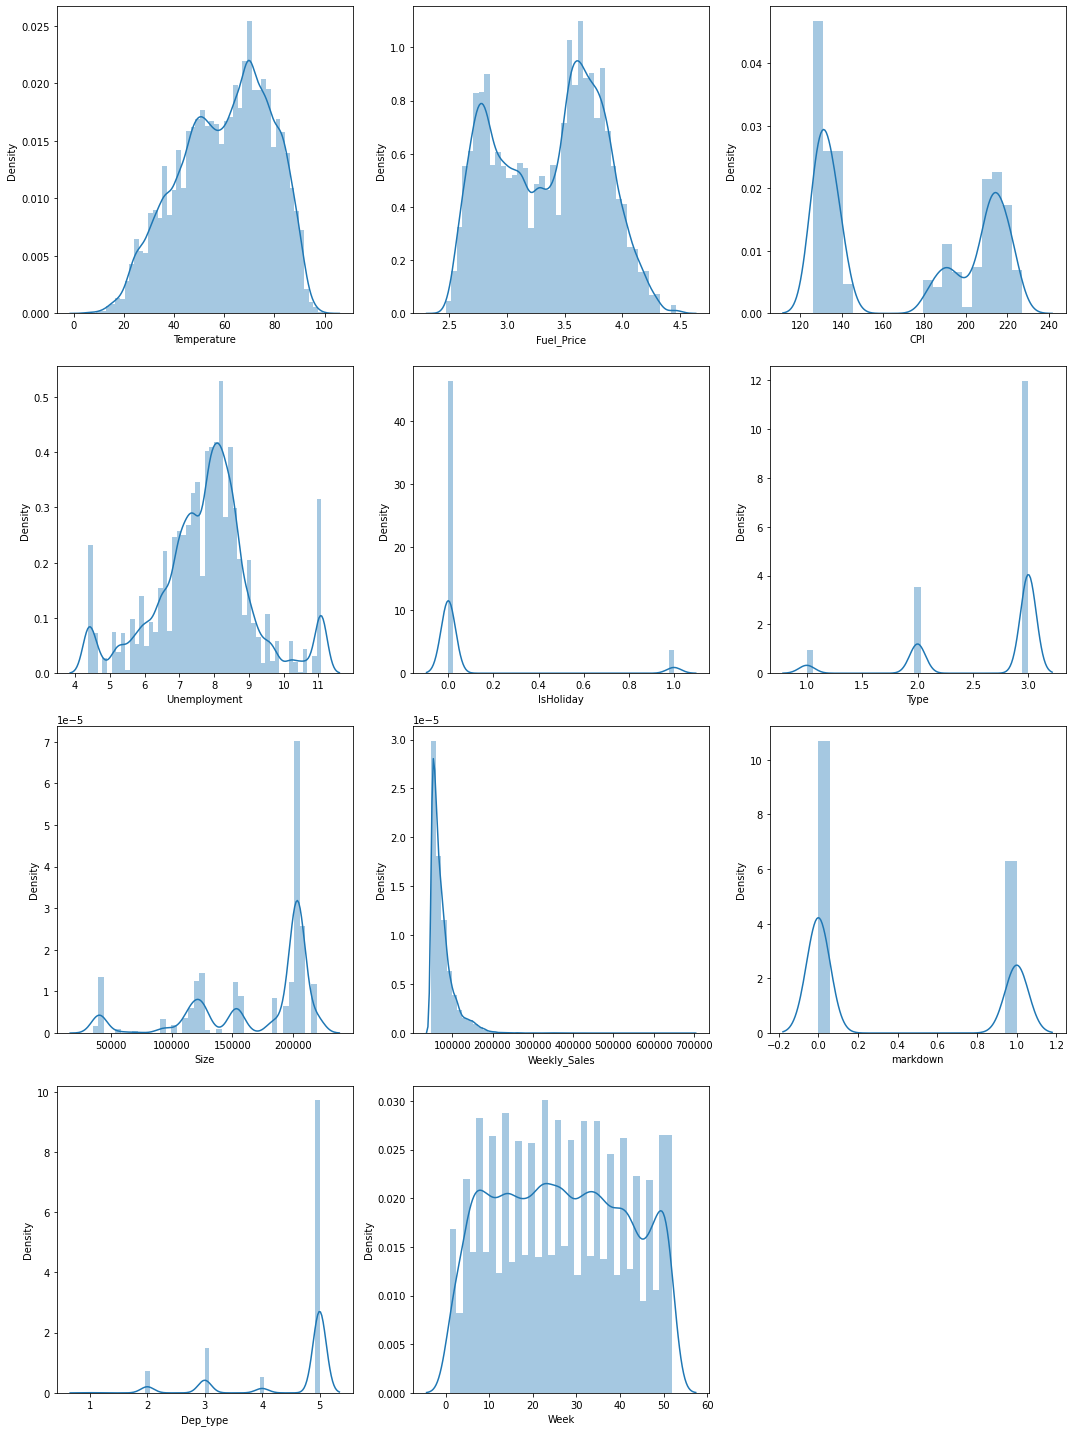

In [ ]:
plt.figure(figsize=(15,20))
for i,col in enumerate(df.columns,1):
  plt.subplot(4,3,i)
  sns.distplot(df[col])
  plt.tight_layout()

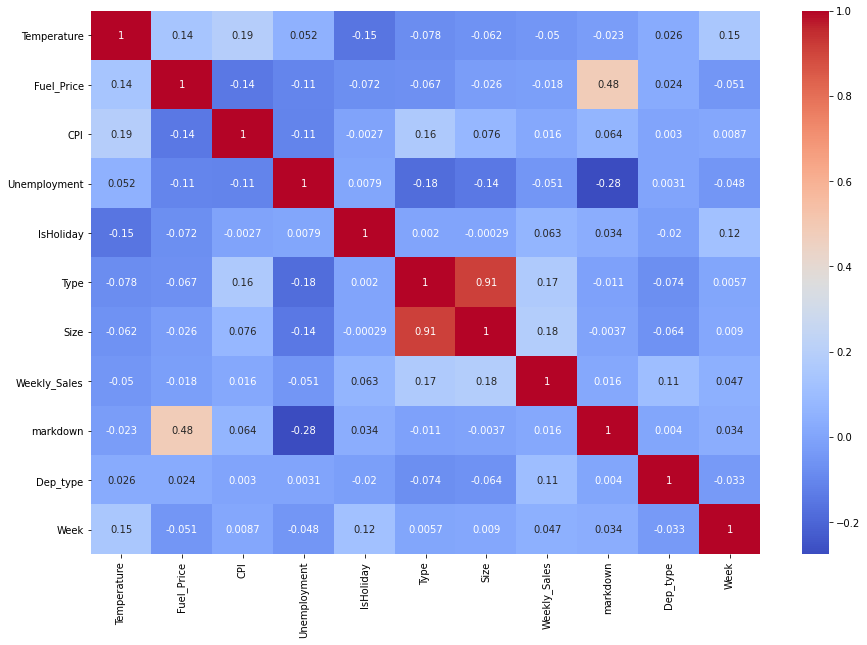

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

**Inference: From the above graph we can see that there is a good correlation between Type and Size column so we can remove any one of the columns from the data set to remove mutlicollinearity**

In [ ]:
# removing Type column from the data set
df = df.drop('Type',axis=1)

# Checking and Treating the outliers in the data set in the numerical continuous columns

In [ ]:
num_col = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment','Size','Weekly_Sales']

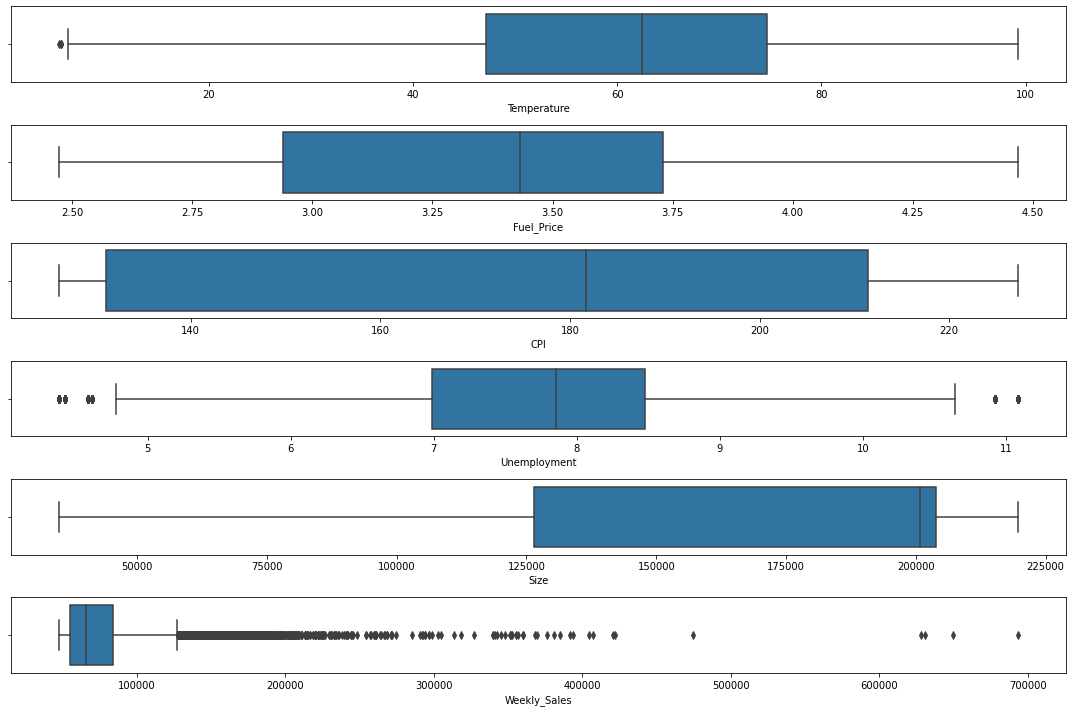

In [ ]:
plt.figure(figsize=(15,10))
for i,col in enumerate(num_col,1):
  plt.subplot(6,1,i)
  sns.boxplot(df[col])
  plt.tight_layout()

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df['weekly_sales_z_score'] = ss.fit_transform(df[['Weekly_Sales']])

In [ ]:
df.head()

,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Size,Weekly_Sales,markdown,Dep_type,Week,weekly_sales_z_score
0,70.98,3.545,130.790968,5.936,0,93188,48071.57,1,5,33,-0.896243
1,65.21,2.645,126.279167,10.210,0,158114,67464.65,0,5,40,-0.255139
2,74.86,4.004,135.963935,7.806,0,203819,75406.78,0,5,30,0.007415
3,26.39,3.240,137.054243,8.458,0,119557,60235.59,0,5,5,-0.494120
4,85.26,3.227,221.521506,6.565,0,140167,48490.86,1,5,27,-0.882382


In [ ]:
df = df[np.abs(df['weekly_sales_z_score'])<3]

In [ ]:
df.shape

(34788, 11)

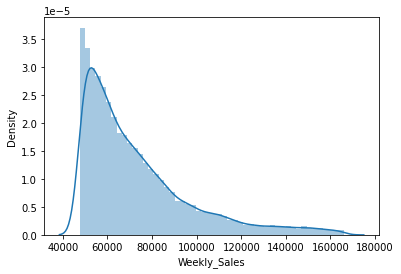

In [ ]:
sns.distplot(df['Weekly_Sales'])

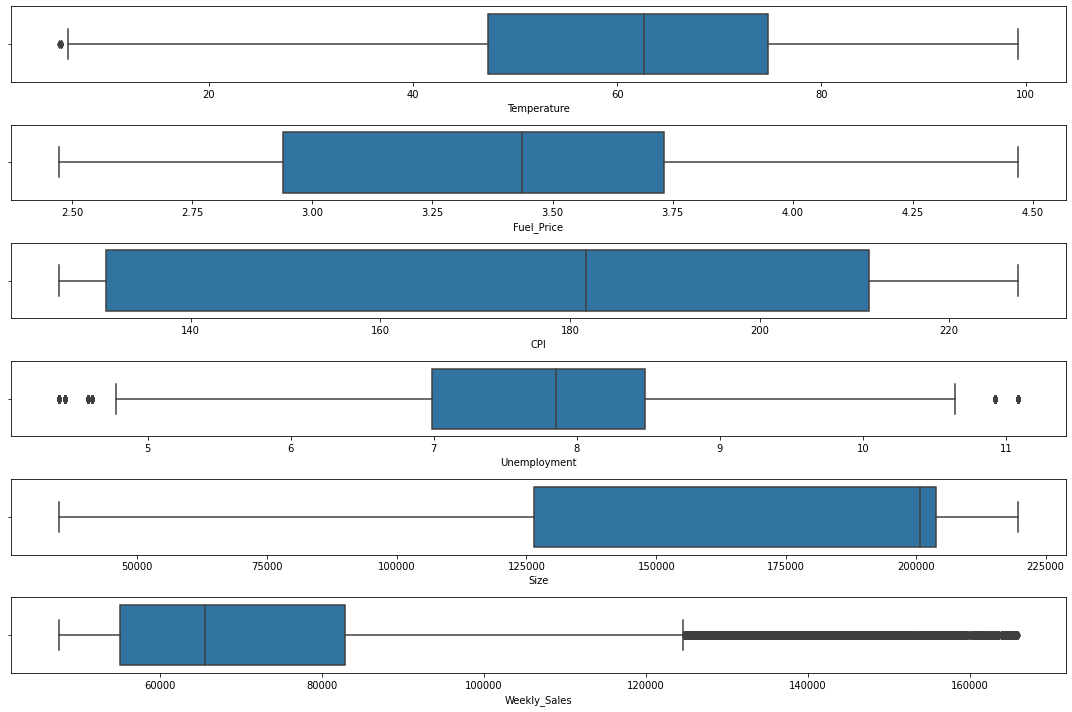

In [ ]:
plt.figure(figsize=(15,10))
for i,col in enumerate(num_col,1):
  plt.subplot(6,1,i)
  sns.boxplot(df[col])
  plt.tight_layout()

In [ ]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='box-cox')
df[['Temperature','Unemployment','Weekly_Sales']] = pt.fit_transform(df[['Temperature','Unemployment','Weekly_Sales']])

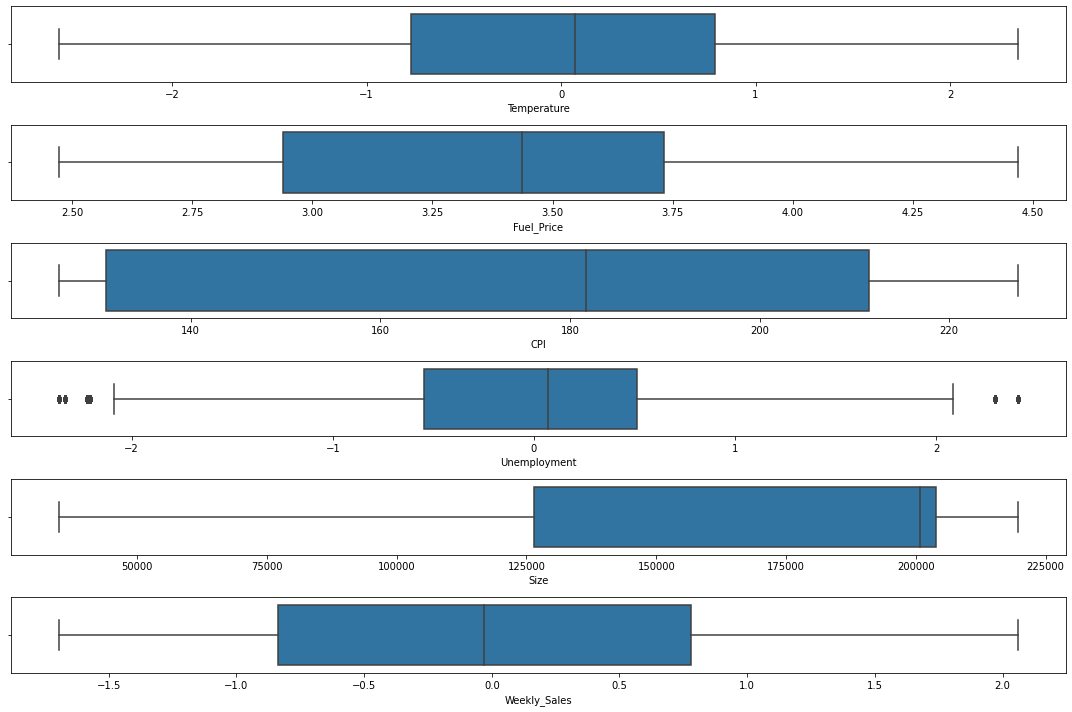

In [ ]:
plt.figure(figsize=(15,10))
for i,col in enumerate(num_col,1):
  plt.subplot(6,1,i)
  sns.boxplot(df[col])
  plt.tight_layout()

In [ ]:
df = df.drop('weekly_sales_z_score',axis=1)

In [ ]:
import statsmodels.api as sm
x = df.drop('Weekly_Sales',axis=1)
y = df['Weekly_Sales']
xc = sm.add_constant(x)
model = sm.OLS(y,xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     264.6
Date:                Fri, 16 Apr 2021   Prob (F-statistic):               0.00
Time:                        20:52:15   Log-Likelihood:                -48210.
No. Observations:               34788   AIC:                         9.644e+04
Df Residuals:                   34778   BIC:                         9.652e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.3608      0.065    -21.079      0.000      -1.487      -1.234
Temperature      0.0019      0.006      0.338      0.735      -0.009       0.013
Fuel_Price      -0.0223      0.014     -1.617      0.106      -0.049       0.005
CPI              0.0002      0.000      1.228      0.219      -0.000       0.000
Unemployment    -0.0387      0.005     -7.037      0.000      -0.049      -0.028
IsHoliday        0.0472      0.021      2.291      0.022       0.007       0.088
Size           4.04e-06   1.04e-07     38.951      0.000    3.84e-06    4.24e-06
markdown         0.0061      0.013      0.467      0.641      -0.019       0.032
Dep_type         0.1587      0.006     28.390      0.000       0.148       0.170
Week         -2.011e-05      0.000     -0.054      0.957      -0.001       0.001
==============================================================================
Omnibus:                     5128.340   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1230.140
Skew:                           0.060   Prob(JB):                    7.56e-268
Kurtosis:                       2.087   Cond. No.                     2.23e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.23e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
cols = list(xc.columns)
while(len(cols)>0):
  x1 = xc[cols]
  model = sm.OLS(y,x1).fit()
  pval = model.pvalues.drop('const')
  mx_pval = max(pval)
  mx_feat = pval.idxmax()
  if mx_pval>0.05:
    print(mx_feat,mx_pval)
    cols.remove(mx_feat)
  else:
    break

print(cols)

Week 0.9568247649751083
Temperature 0.7382894068629455
markdown 0.6682480145007051
CPI 0.15524233099690032
Fuel_Price 0.06813349200783969
['const', 'Unemployment', 'IsHoliday', 'Size', 'Dep_type']


In [ ]:
xc_n = xc[cols]
model_n = sm.OLS(y,xc_n).fit()
model_n.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     594.0
Date:                Fri, 16 Apr 2021   Prob (F-statistic):               0.00
Time:                        20:52:22   Log-Likelihood:                -48213.
No. Observations:               34788   AIC:                         9.644e+04
Df Residuals:                   34783   BIC:                         9.648e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.4058      0.032    -43.693      0.000      -1.469      -1.343
Unemployment    -0.0390      0.005     -7.450      0.000      -0.049      -0.029
IsHoliday        0.0491      0.020      2.440      0.015       0.010       0.089
Size          4.051e-06   1.03e-07     39.274      0.000    3.85e-06    4.25e-06
Dep_type         0.1585      0.006     28.390      0.000       0.148       0.169
==============================================================================
Omnibus:                     5142.778   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1231.493
Skew:                           0.060   Prob(JB):                    3.84e-268
Kurtosis:                       2.086   Cond. No.                     1.11e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
resids = model_n.resid

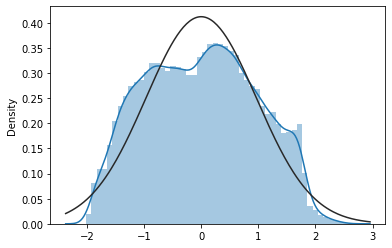

In [ ]:
import scipy.stats as st
sns.distplot(resids,fit=st.norm)

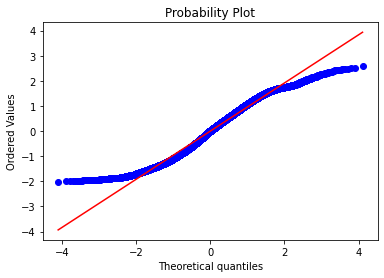

In [ ]:
st.probplot(resids,plot=plt)
plt.show()

In [ ]:
# splitting the data set into train and test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
def cross_val(algo,x=x,y=y):
  kf = KFold(n_splits=10,random_state=10,shuffle=True)
  score = cross_val_score(algo,x,y,cv=kf,scoring='r2',n_jobs=-1)
  return score

In [ ]:
def model_res(algo,x_train=x_train,x_test=x_test,y_train=y_train,y_test=y_test):
  if algo==lr:
    algo.fit(x_train,y_train)
    cof_df = pd.DataFrame(algo.coef_,index=x_train.columns,columns=['Coefs_lr'])
    print(cof_df)
    print()
    print('Intercept = {}'.format(algo.intercept_))
    print('***'*40)
    y_pred_train = algo.predict(x_train)
    y_pred_test = algo.predict(x_test)

    print('Evaluation of the model on Train data set')
    print('R-squared = {}'.format(r2_score(y_train,y_pred_train)))
    print('RMSE = {}'.format(np.sqrt(mean_squared_error(y_train,y_pred_train))))
    print('MAE = {}'.format(mean_absolute_error(y_train,y_pred_train)))
    print('***'*40)
    print('Evaluation of the model on Test data set')
    print('R-squared = {}'.format(r2_score(y_test,y_pred_test)))
    print('RMSE = {}'.format(np.sqrt(mean_squared_error(y_test,y_pred_test))))
    print('MAE = {}'.format(mean_absolute_error(y_test,y_pred_test)))
  else:
    algo.fit(x_train,y_train)
    feat_df = pd.DataFrame(algo.feature_importances_,index=x_train.columns,columns=['IMP']).sort_values('IMP',ascending=False)
    print(feat_df)
    print()
    y_pred_train = algo.predict(x_train)
    y_pred_test = algo.predict(x_test)

    print('Evaluation of the model on Train data set')
    print('R-squared = {}'.format(r2_score(y_train,y_pred_train)))
    print('RMSE = {}'.format(np.sqrt(mean_squared_error(y_train,y_pred_train))))
    print('MAE = {}'.format(mean_absolute_error(y_train,y_pred_train)))
    print('***'*40)
    print('Evaluation of the model on Test data set')
    print('R-squared = {}'.format(r2_score(y_test,y_pred_test)))
    print('RMSE = {}'.format(np.sqrt(mean_squared_error(y_test,y_pred_test))))
    print('MAE = {}'.format(mean_absolute_error(y_test,y_pred_test)))

In [ ]:
lr = LinearRegression()
dtr = DecisionTreeRegressor(random_state=10)
rfr = RandomForestRegressor(random_state=10,)
lgbr = lgb.LGBMRegressor(importance_type='split',random_state=10)

In [ ]:
cross_score_df = pd.DataFrame({'Linear Model':cross_val(lr),'Decision Tree':cross_val(dtr),'Random Forest':cross_val(rfr),'LightGBM':cross_val(lgbr)})

In [ ]:
cross_score_df

,Linear Model,Decision Tree,Random Forest,LightGBM
0,0.065183,-0.126480,-0.030737,0.228698
1,0.067696,-0.130265,-0.034150,0.221995
2,0.080982,-0.083267,0.005599,0.235630
3,0.051189,-0.138325,-0.026284,0.221925
4,0.069881,-0.133419,-0.038620,0.208671
5,0.063353,-0.149255,-0.041366,0.220918
6,0.050328,-0.114721,-0.025059,0.215117
7,0.058073,-0.126943,-0.049829,0.201068
8,0.058510,-0.093305,-0.012306,0.223065
9,0.067163,-0.112360,-0.012581,0.220838


Text(0, 0.5, 'Regression Algorithm')

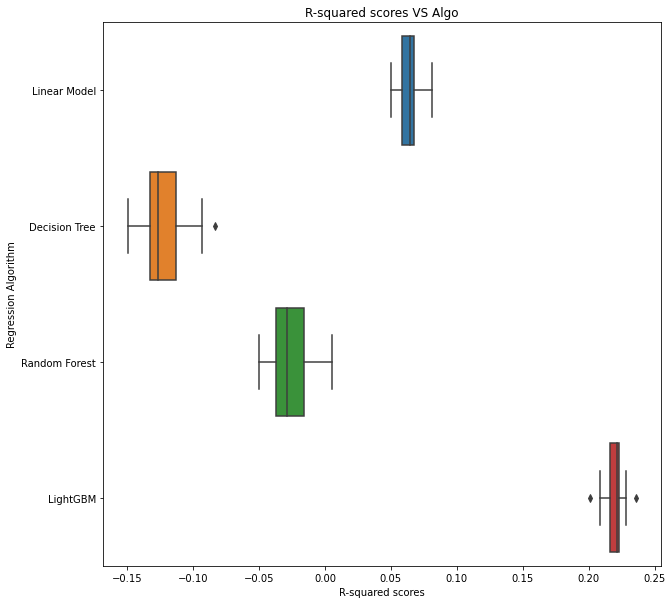

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(data=cross_score_df,orient='h')
plt.xlabel('R-squared scores')
plt.title('R-squared scores VS Algo') 
plt.ylabel('Regression Algorithm')

In [ ]:
model_res(lr)

              Coefs_lr
Temperature  -0.000746
Fuel_Price   -0.016168
CPI           0.000305
Unemployment -0.040995
IsHoliday     0.037131
Size          0.000004
markdown     -0.010028
Dep_type      0.159525
Week          0.000416

Intercept = -1.3973911787649613
************************************************************************************************************************
Evaluation of the model on Train data set
R-squared = 0.0620432538678094
RMSE = 0.971203006705294
MAE = 0.8194296799995225
************************************************************************************************************************
Evaluation of the model on Test data set
R-squared = 0.06853773835278187
RMSE = 0.9587590927779852
MAE = 0.8113323246759419


In [ ]:
model_res(dtr)

                   IMP
Size          0.342424
CPI           0.138736
Dep_type      0.124722
Week          0.122307
Temperature   0.112340
Fuel_Price    0.088534
Unemployment  0.058968
IsHoliday     0.007253
markdown      0.004715

Evaluation of the model on Train data set
R-squared = 0.39365619805240526
RMSE = 0.7808688236051492
MAE = 0.5767361924844233
************************************************************************************************************************
Evaluation of the model on Test data set
R-squared = -0.15700378669667203
RMSE = 1.0685485366970309
MAE = 0.8670934709943597


In [ ]:
model_res(rfr)

                   IMP
Size          0.252830
CPI           0.156822
Temperature   0.149996
Fuel_Price    0.127433
Week          0.127153
Dep_type      0.107251
Unemployment  0.062008
IsHoliday     0.011059
markdown      0.005448

Evaluation of the model on Train data set
R-squared = 0.38124755408850786
RMSE = 0.7888184808311924
MAE = 0.6118173146417462
************************************************************************************************************************
Evaluation of the model on Test data set
R-squared = -0.04036416964199341
RMSE = 1.0132568701166942
MAE = 0.8199095673364039


In [ ]:
model_res(lgbr)

              IMP
Size          668
Week          440
CPI           437
Temperature   401
Unemployment  358
Dep_type      334
Fuel_Price    306
IsHoliday      39
markdown       17

Evaluation of the model on Train data set
R-squared = 0.2619525368411678
RMSE = 0.8615108640468533
MAE = 0.7047201890694214
************************************************************************************************************************
Evaluation of the model on Test data set
R-squared = 0.22316699799509698
RMSE = 0.8755696464960596
MAE = 0.7188124626742143


In [ ]:
lgbmr_t = lgb.LGBMRegressor() 
params = {'n_estimators':sp_randint(100,250),
          'max_depth':sp_randint(2,15),
          'learning_rate':sp_uniform(0.1,1)}

rsearch = RandomizedSearchCV(lgbmr_t,param_distributions=params,cv=3,n_iter=50,scoring='r2',n_jobs=-1,random_state=10)
rsearch.fit(x,y)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=LGBMRegressor(boosting_type='gbdt',
                                           class_weight=None,
                                           colsample_bytree=1.0,
                                           importance_type='split',
                                           learning_rate=0.1, max_depth=-1,
                                           min_child_samples=20,
                                           min_child_weight=0.001,
                                           min_split_gain=0.0, n_estimators=100,
                                           n_jobs=-1, num_leaves=31,
                                           objective=None, random_state=None,
                                           reg_alpha=0.0, reg_lambda=0.0,
                                           silen...
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7effd7c37850>,
       

In [ ]:
# best_params = rsearch.best_params_
best_params = {'learning_rate': 0.21464879919847205, 'max_depth': 3, 'n_estimators': 181}

In [ ]:
lgbmr = lgb.LGBMRegressor(**best_params,random_state=10,importance_type='split')
model_res(lgbmr)

              IMP
Size          309
Dep_type      213
Week          165
CPI           163
Unemployment  153
Temperature   123
Fuel_Price     92
IsHoliday      13
markdown        4

Evaluation of the model on Train data set
R-squared = 0.23394026903283616
RMSE = 0.8777077424558515
MAE = 0.7203009407303749
************************************************************************************************************************
Evaluation of the model on Test data set
R-squared = 0.21542206984529844
RMSE = 0.8799234817022029
MAE = 0.7245213424746655


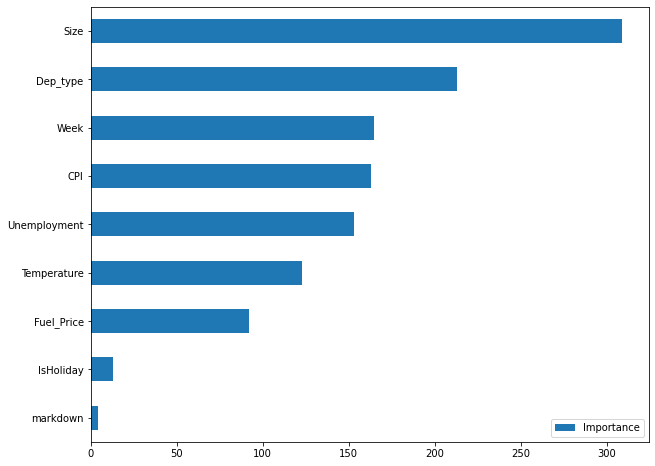

In [ ]:
pd.DataFrame(lgbmr.feature_importances_,index = x_train.columns,columns = ['Importance']).sort_values('Importance').plot(kind='barh',figsize=(10,8))

In [ ]:
y_pred = lgbmr.predict(x)

In [ ]:
df['Weekly_Sales_pred'] = y_pred


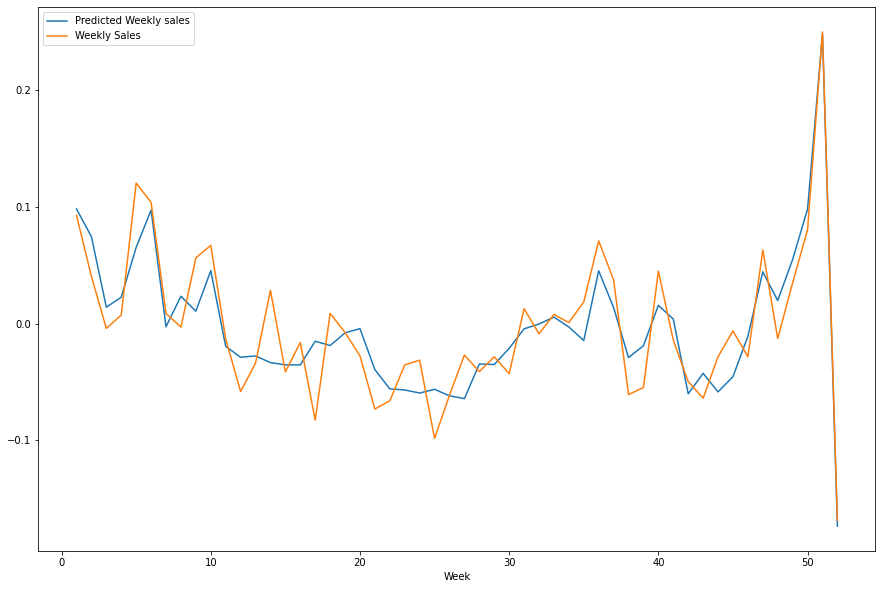

In [ ]:
plt.figure(figsize=(15,10))
df['Weekly_Sales_pred'].groupby(df['Week']).mean().plot(kind='line',label = 'Predicted Weekly sales')
df['Weekly_Sales'].groupby(df['Week']).mean().plot(kind='line',label = 'Weekly Sales')
plt.legend()
plt.show()

**Inference:From the above graph we can

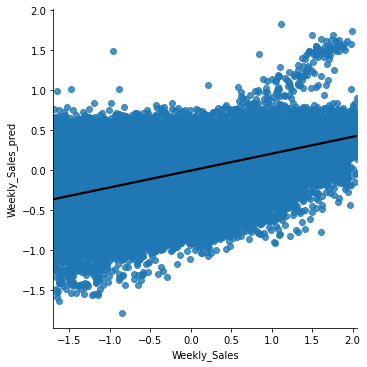

In [ ]:
sns.lmplot('Weekly_Sales','Weekly_Sales_pred',data=df,line_kws={'color':'black'})

In [ ]:
print('Correlation coeffecient of the relation between predicted weekly sales and Weekly sales ={}'.format(df.corr()['Weekly_Sales']['Weekly_Sales_pred']))

Correlation coeffecient of the relation between predicted weekly sales and Weekly sales =0.479589741386464


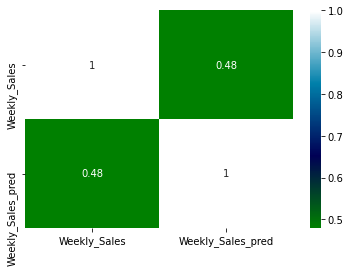

In [ ]:
sns.heatmap(df[['Weekly_Sales','Weekly_Sales_pred']].corr(),annot=True,cmap='ocean')